In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import seaborn as sns


%matplotlib inline

import matplotlib
%config InlineBackend.figure_format='retina'

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

# turn off warnings
import warnings
warnings.filterwarnings('ignore')
# turn off future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [247]:
df = pd.read_excel('./autonomy-data-SI-paper-normalized.xlsx')
df

,EU_country,Code,A,EIS,CPI,GDP,A 2017,EIS 2017,CPI 2017,GDP 2017
0,Austria,AT,0.872464,0.871053,0.788889,0.917984,0.776860,0.900508,0.852273,0.978617
1,Croatia,HR,0.481159,0.505504,0.555556,0.545630,0.575758,0.446422,0.556818,0.491484
2,Denmark,DK,0.910145,1.000000,1.000000,1.000000,0.892562,0.977210,1.000000,1.000000
3,Estonia,EE,1.000000,0.716929,0.844444,0.630999,1.000000,0.572684,0.806818,0.610982
4,Finland,FI,0.991304,0.975797,0.966667,0.797599,0.942149,0.912823,0.965909,0.859339
5,France,FR,0.542029,0.765238,0.788889,0.749844,0.506887,0.839551,0.795455,0.805270
6,Italy,IT,0.695652,0.656581,0.622222,0.700826,0.647383,0.607008,0.568182,0.751149
7,Latvia,LV,0.878261,0.381708,0.666667,0.539909,0.771350,0.384851,0.659091,0.517978
8,Lithuania,LT,0.826087,0.609234,0.677778,0.653961,0.754821,0.536801,0.670455,0.609897
9,Netherlands,NL,0.831884,0.935086,0.877778,0.940166,0.735537,0.961342,0.931818,0.995158


In [4]:
df_t = df.T
# remove the first row
df_t = df_t.iloc[1:]
# first row is the column names
df_t.columns = df_t.iloc[0]
df_t
# remove the first row
df_t = df_t.iloc[1:]
df_t

Code,AT,HR,DK,EE,FI,FR,IT,LV,LT,NL,PL,PT,SK,SI,ES,SE
A,0.872464,0.481159,0.910145,1.0,0.991304,0.542029,0.695652,0.878261,0.826087,0.831884,0.828986,0.771014,0.724638,0.637681,0.628986,0.808696
EIS,0.871053,0.505504,1.0,0.716929,0.975797,0.765238,0.656581,0.381708,0.609234,0.935086,0.456247,0.622365,0.476943,0.690849,0.648576,0.977744
CPI,0.788889,0.555556,1.0,0.844444,0.966667,0.788889,0.622222,0.666667,0.677778,0.877778,0.6,0.677778,0.6,0.622222,0.666667,0.911111
GDP,0.917984,0.54563,1.0,0.630999,0.797599,0.749844,0.700826,0.539909,0.653961,0.940166,0.584667,0.560115,0.506172,0.676053,0.619214,0.872616
A 2017,0.77686,0.575758,0.892562,1.0,0.942149,0.506887,0.647383,0.77135,0.754821,0.735537,0.752066,0.732782,0.630854,0.578512,0.592287,0.77135
EIS 2017,0.900508,0.446422,0.97721,0.572684,0.912823,0.839551,0.607008,0.384851,0.536801,0.961342,0.409893,0.617592,0.480002,0.712503,0.640415,1.0
CPI 2017,0.852273,0.556818,1.0,0.806818,0.965909,0.795455,0.568182,0.659091,0.670455,0.931818,0.681818,0.715909,0.568182,0.693182,0.647727,0.954545
GDP 2017,0.978617,0.491484,1.0,0.610982,0.859339,0.80527,0.751149,0.517978,0.609897,0.995158,0.541183,0.596942,0.544512,0.659497,0.714461,0.938422


In [5]:
# correlate 'SI' and 'AT', get the correlation coefficient and p-value, use spearman method
from scipy.stats import spearmanr
corr, p_value = spearmanr(df_t['SI'], df_t['FR'])
corr, p_value

(0.6666666666666669, 0.07098765432098751)

In [12]:
# correlate 'SI' and 'AT', get the correlation coefficient and p-value, use spearman method, use only first 4 rows
from scipy.stats import spearmanr
corr, p_value = spearmanr(df_t['FR'][:4], df_t['SI'][:4])
corr, p_value


(-0.19999999999999998, 0.8)

In [13]:
# remove first two columns from df and make a new dataframe data
data = df.iloc[:,2:6]
# reindex data
data = data.reset_index(drop=True)
data

,A,EIS,CPI,GDP
0,0.872464,0.871053,0.788889,0.917984
1,0.481159,0.505504,0.555556,0.545630
2,0.910145,1.000000,1.000000,1.000000
3,1.000000,0.716929,0.844444,0.630999
4,0.991304,0.975797,0.966667,0.797599
5,0.542029,0.765238,0.788889,0.749844
6,0.695652,0.656581,0.622222,0.700826
7,0.878261,0.381708,0.666667,0.539909
8,0.826087,0.609234,0.677778,0.653961
9,0.831884,0.935086,0.877778,0.940166


In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

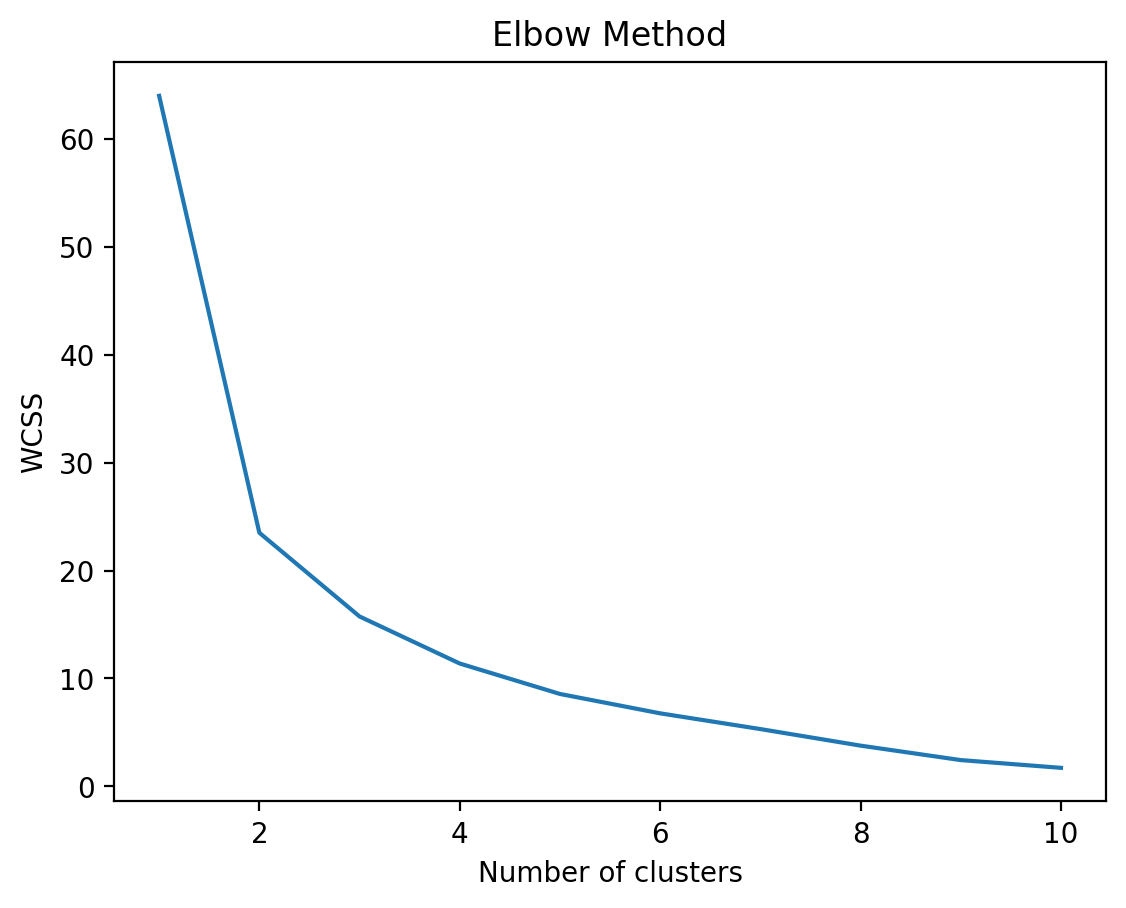

In [15]:
wcss = []
for i in range(1, 11):
    #kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [150]:
nclust = np.sqrt(17/2.)
optimal_number_of_clusters = 3
kmeans = KMeans(n_clusters=optimal_number_of_clusters, init='k-means++')
y_kmeans = kmeans.fit_predict(data_scaled)
nclust

2.9154759474226504

In [151]:
data['Cluster'] = y_kmeans

In [152]:
data

,A,EIS,CPI,GDP,Cluster
0,0.872464,0.871053,0.788889,0.917984,0
1,0.481159,0.505504,0.555556,0.545630,1
2,0.910145,1.000000,1.000000,1.000000,0
3,1.000000,0.716929,0.844444,0.630999,2
4,0.991304,0.975797,0.966667,0.797599,0
5,0.542029,0.765238,0.788889,0.749844,1
6,0.695652,0.656581,0.622222,0.700826,1
7,0.878261,0.381708,0.666667,0.539909,2
8,0.826087,0.609234,0.677778,0.653961,2
9,0.831884,0.935086,0.877778,0.940166,0


In [153]:
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

                A       EIS       CPI       GDP
Cluster                                        
0        0.882899  0.951936  0.908889  0.905673
1        0.597101  0.653350  0.651111  0.658313
2        0.838164  0.543904  0.677778  0.579304


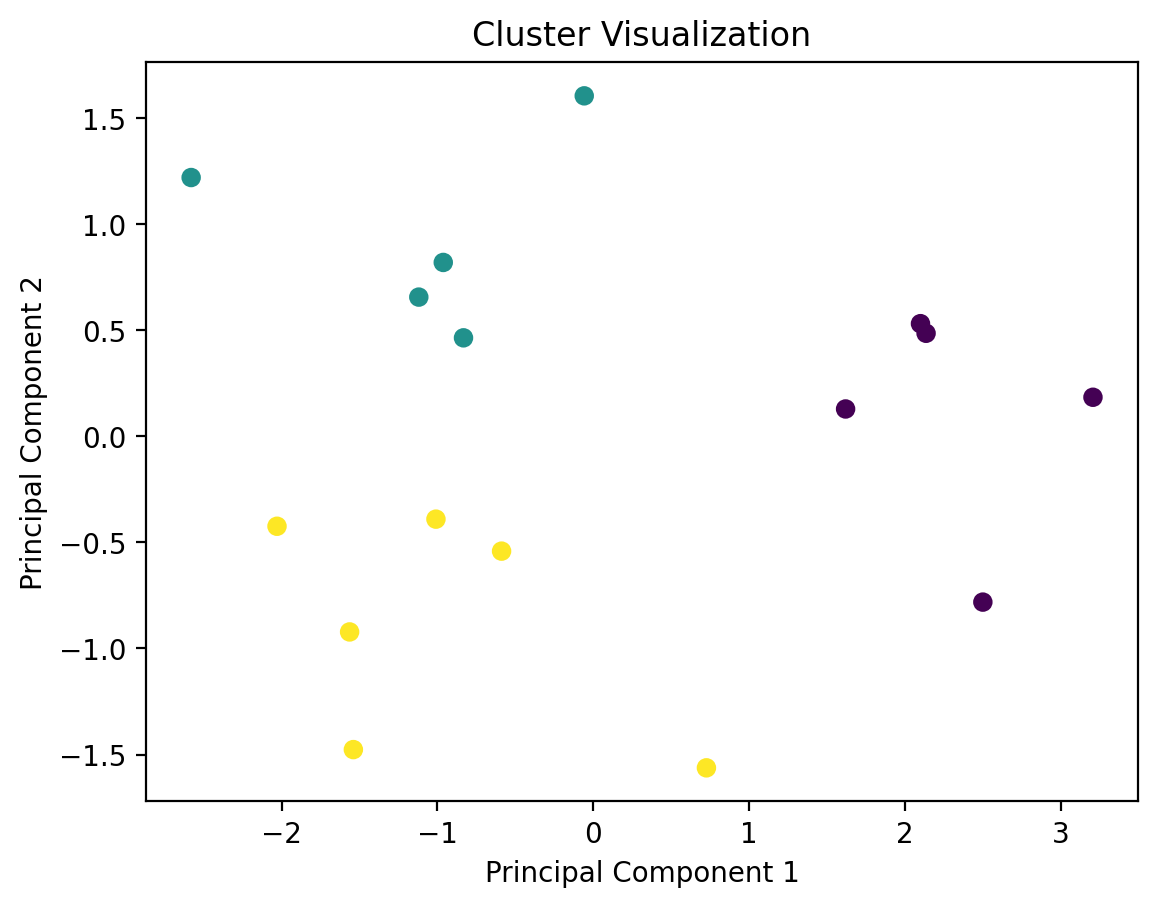

In [154]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_kmeans)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

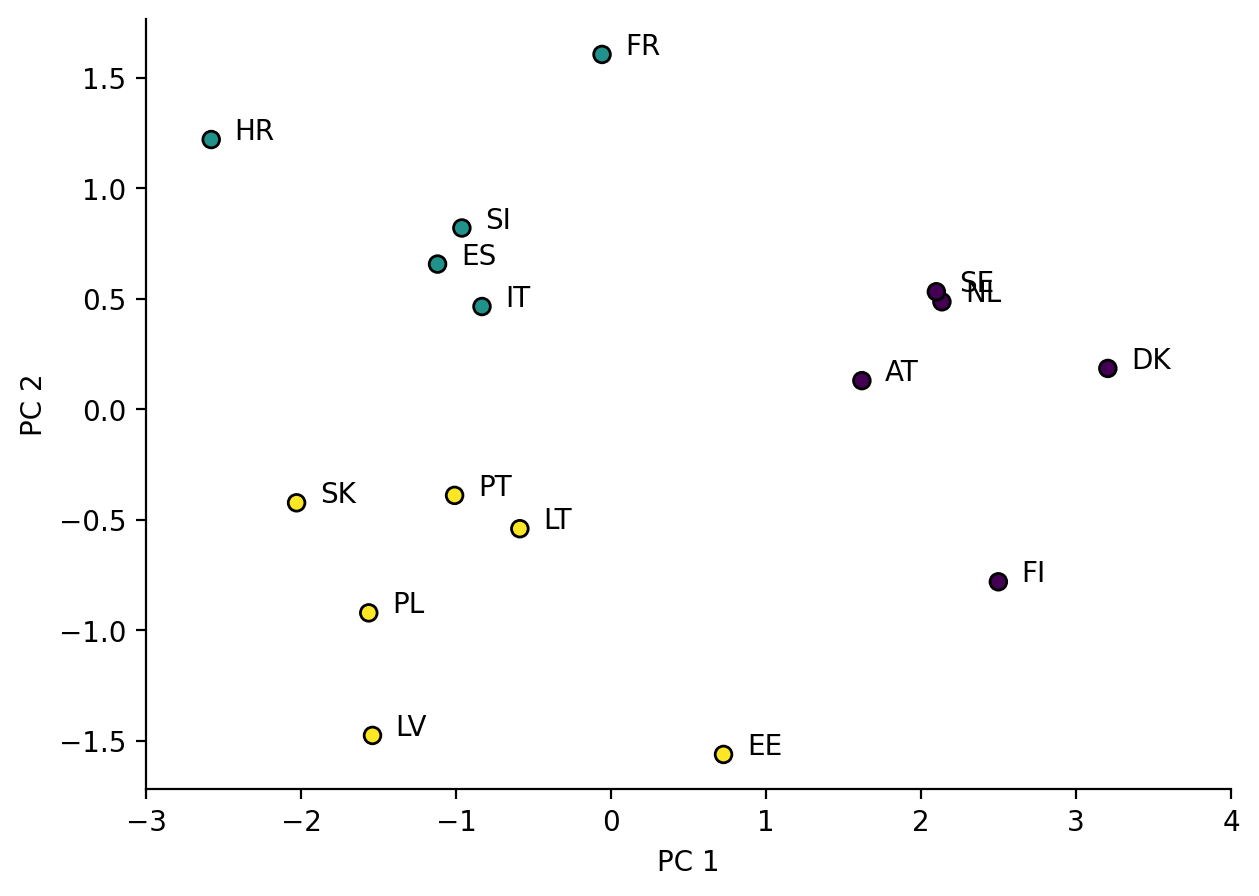

In [196]:
# plot principal components again add labels to the points from df['Code']
#plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_kmeans)
for i, txt in enumerate(df['Code']):
    plt.annotate(txt, (principal_components[i, 0]+0.15, principal_components[i, 1]+0.0))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# set aspect of the plot to be equal
plt.gcf().set_size_inches(7, 5)
# no frame  around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(-3, 4)
# use black, empty markers, square for cluster 0, circle for cluster 1, triangle for cluster 2



plt.show()

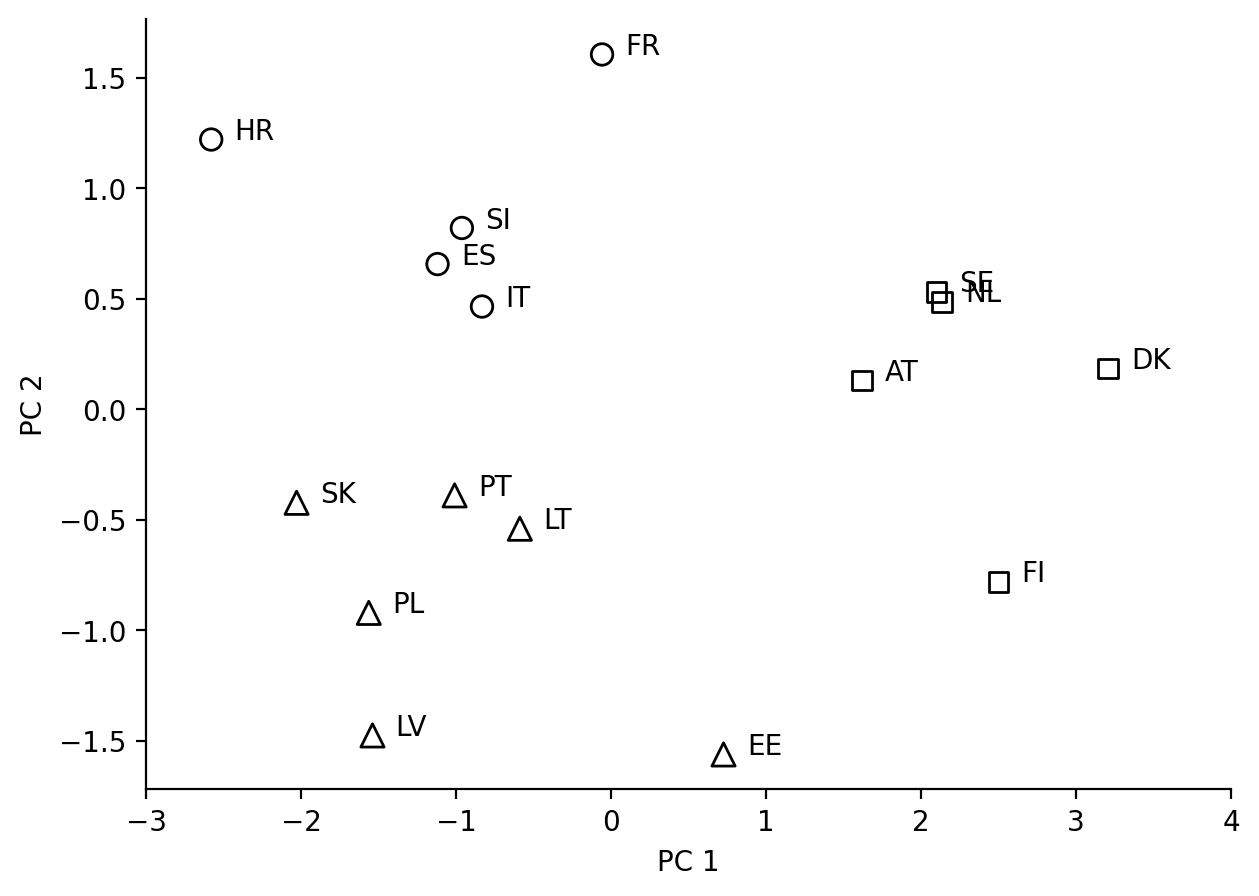

In [207]:
# plot principal components again add labels to the points from df['Code'], mark the clusters with different shapes
for i, txt in enumerate(df['Code']):
    plt.annotate(txt, (principal_components[i, 0]+0.15, principal_components[i, 1]+0.0))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# set aspect of the plot to be equal
plt.gcf().set_size_inches(7, 5)
# no frame  around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(-3, 4)
# use black, empty markers, square for cluster 0, circle for cluster 1, triangle for cluster 2
plt.scatter(principal_components[y_kmeans==0, 0], principal_components[y_kmeans==0, 1], marker='s', label='Cluster 0',facecolors='none', edgecolors='black', s=50)
plt.scatter(principal_components[y_kmeans==1, 0], principal_components[y_kmeans==1, 1], marker='o', label='Cluster 1',facecolors='none', edgecolors='black', s=60)
plt.scatter(principal_components[y_kmeans==2, 0], principal_components[y_kmeans==2, 1], marker='^', label='Cluster 2',facecolors='none', edgecolors='black', s=70)




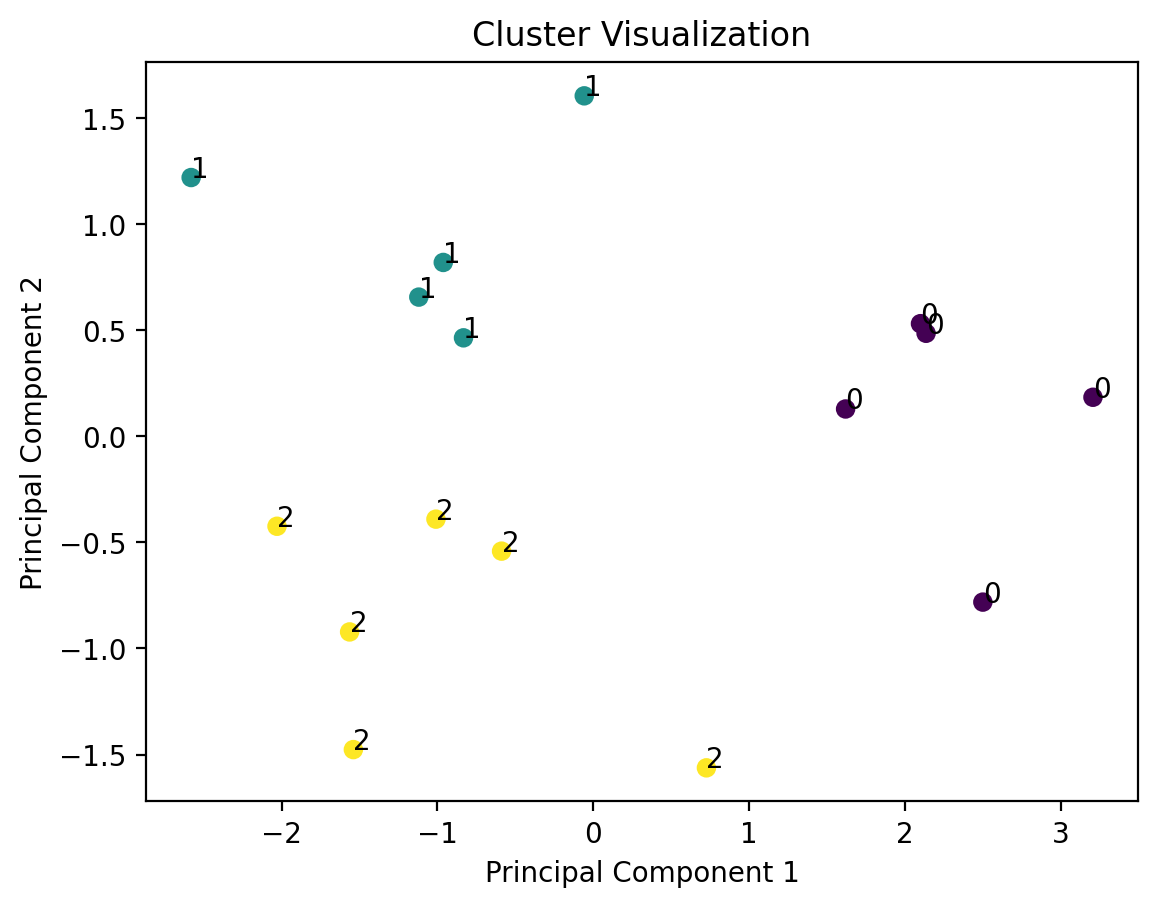

In [158]:
# plot principal components again add labels to the points from data['Cluster']
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_kmeans)
for i, txt in enumerate(data['Cluster']):
    plt.annotate(txt, (principal_components[i, 0], principal_components[i, 1]))
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [23]:
X = data.drop('EIS', axis=1)
y = data['EIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [24]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.012280009772802084


In [26]:
y_pred, y_test

(array([0.52794997, 0.79310744, 0.56805776, 0.55187953, 0.7971805 ,
        0.50879749, 0.55223104]),
 6     0.656581
 0     0.871053
 7     0.381708
 12    0.476943
 5     0.765238
 10    0.456247
 13    0.690849
 Name: EIS, dtype: float64)

In [27]:
df

,EU_country,Code,A,EIS,CPI,GDP,A 2017,EIS 2017,CPI 2017,GDP 2017
0,Austria,AT,0.872464,0.871053,0.788889,0.917984,0.776860,0.900508,0.852273,0.978617
1,Croatia,HR,0.481159,0.505504,0.555556,0.545630,0.575758,0.446422,0.556818,0.491484
2,Denmark,DK,0.910145,1.000000,1.000000,1.000000,0.892562,0.977210,1.000000,1.000000
3,Estonia,EE,1.000000,0.716929,0.844444,0.630999,1.000000,0.572684,0.806818,0.610982
4,Finland,FI,0.991304,0.975797,0.966667,0.797599,0.942149,0.912823,0.965909,0.859339
5,France,FR,0.542029,0.765238,0.788889,0.749844,0.506887,0.839551,0.795455,0.805270
6,Italy,IT,0.695652,0.656581,0.622222,0.700826,0.647383,0.607008,0.568182,0.751149
7,Latvia,LV,0.878261,0.381708,0.666667,0.539909,0.771350,0.384851,0.659091,0.517978
8,Lithuania,LT,0.826087,0.609234,0.677778,0.653961,0.754821,0.536801,0.670455,0.609897
9,Netherlands,NL,0.831884,0.935086,0.877778,0.940166,0.735537,0.961342,0.931818,0.995158


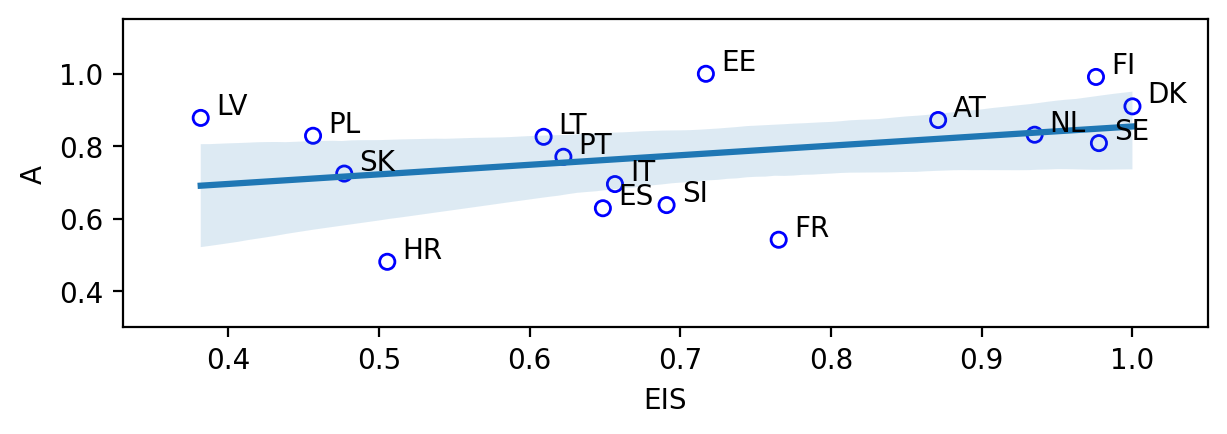

In [108]:
# scatter plot of 'norm_Autonomy' and 'norm_EIS' add labels to the points from df['Code']
col1 = 'EIS'
col2 = 'A'
plt.scatter(df[col1], df[col2], marker='o', s=30, facecolors='none', edgecolors='b')
for i, txt in enumerate(df['Code']):
    plt.annotate(txt, (df[col1][i]+0.01, df[col2][i]+0.01))
plt.xlabel(col1)
plt.ylabel(col2)
# add cluster numbers to the points
#for i, txt in enumerate(data['Cluster']):
#    plt.annotate(txt, (df[col1][i]+0.05, df[col2][i]+0.01))
plt.xlim(0.33, 1.05)
plt.ylim(0.3, 1.15)
# add linear regression line and confidence interval to the plot
sns.regplot(x=col1, y=col2, data=df, scatter=False)
#plt.title(f'{col1} vs {col2}')
# change aspect ratio in cm 
plt.gcf().set_size_inches(7, 2)


plt.show()


In [110]:
# print the correlation coefficient and p-value
from scipy.stats import spearmanr
corr, p_value = spearmanr(df[col1], df[col2])
print(f'Correlation coefficient: {corr}, p-value: {p_value}')

Correlation coefficient: 0.31176470588235294, p-value: 0.23980004767411284


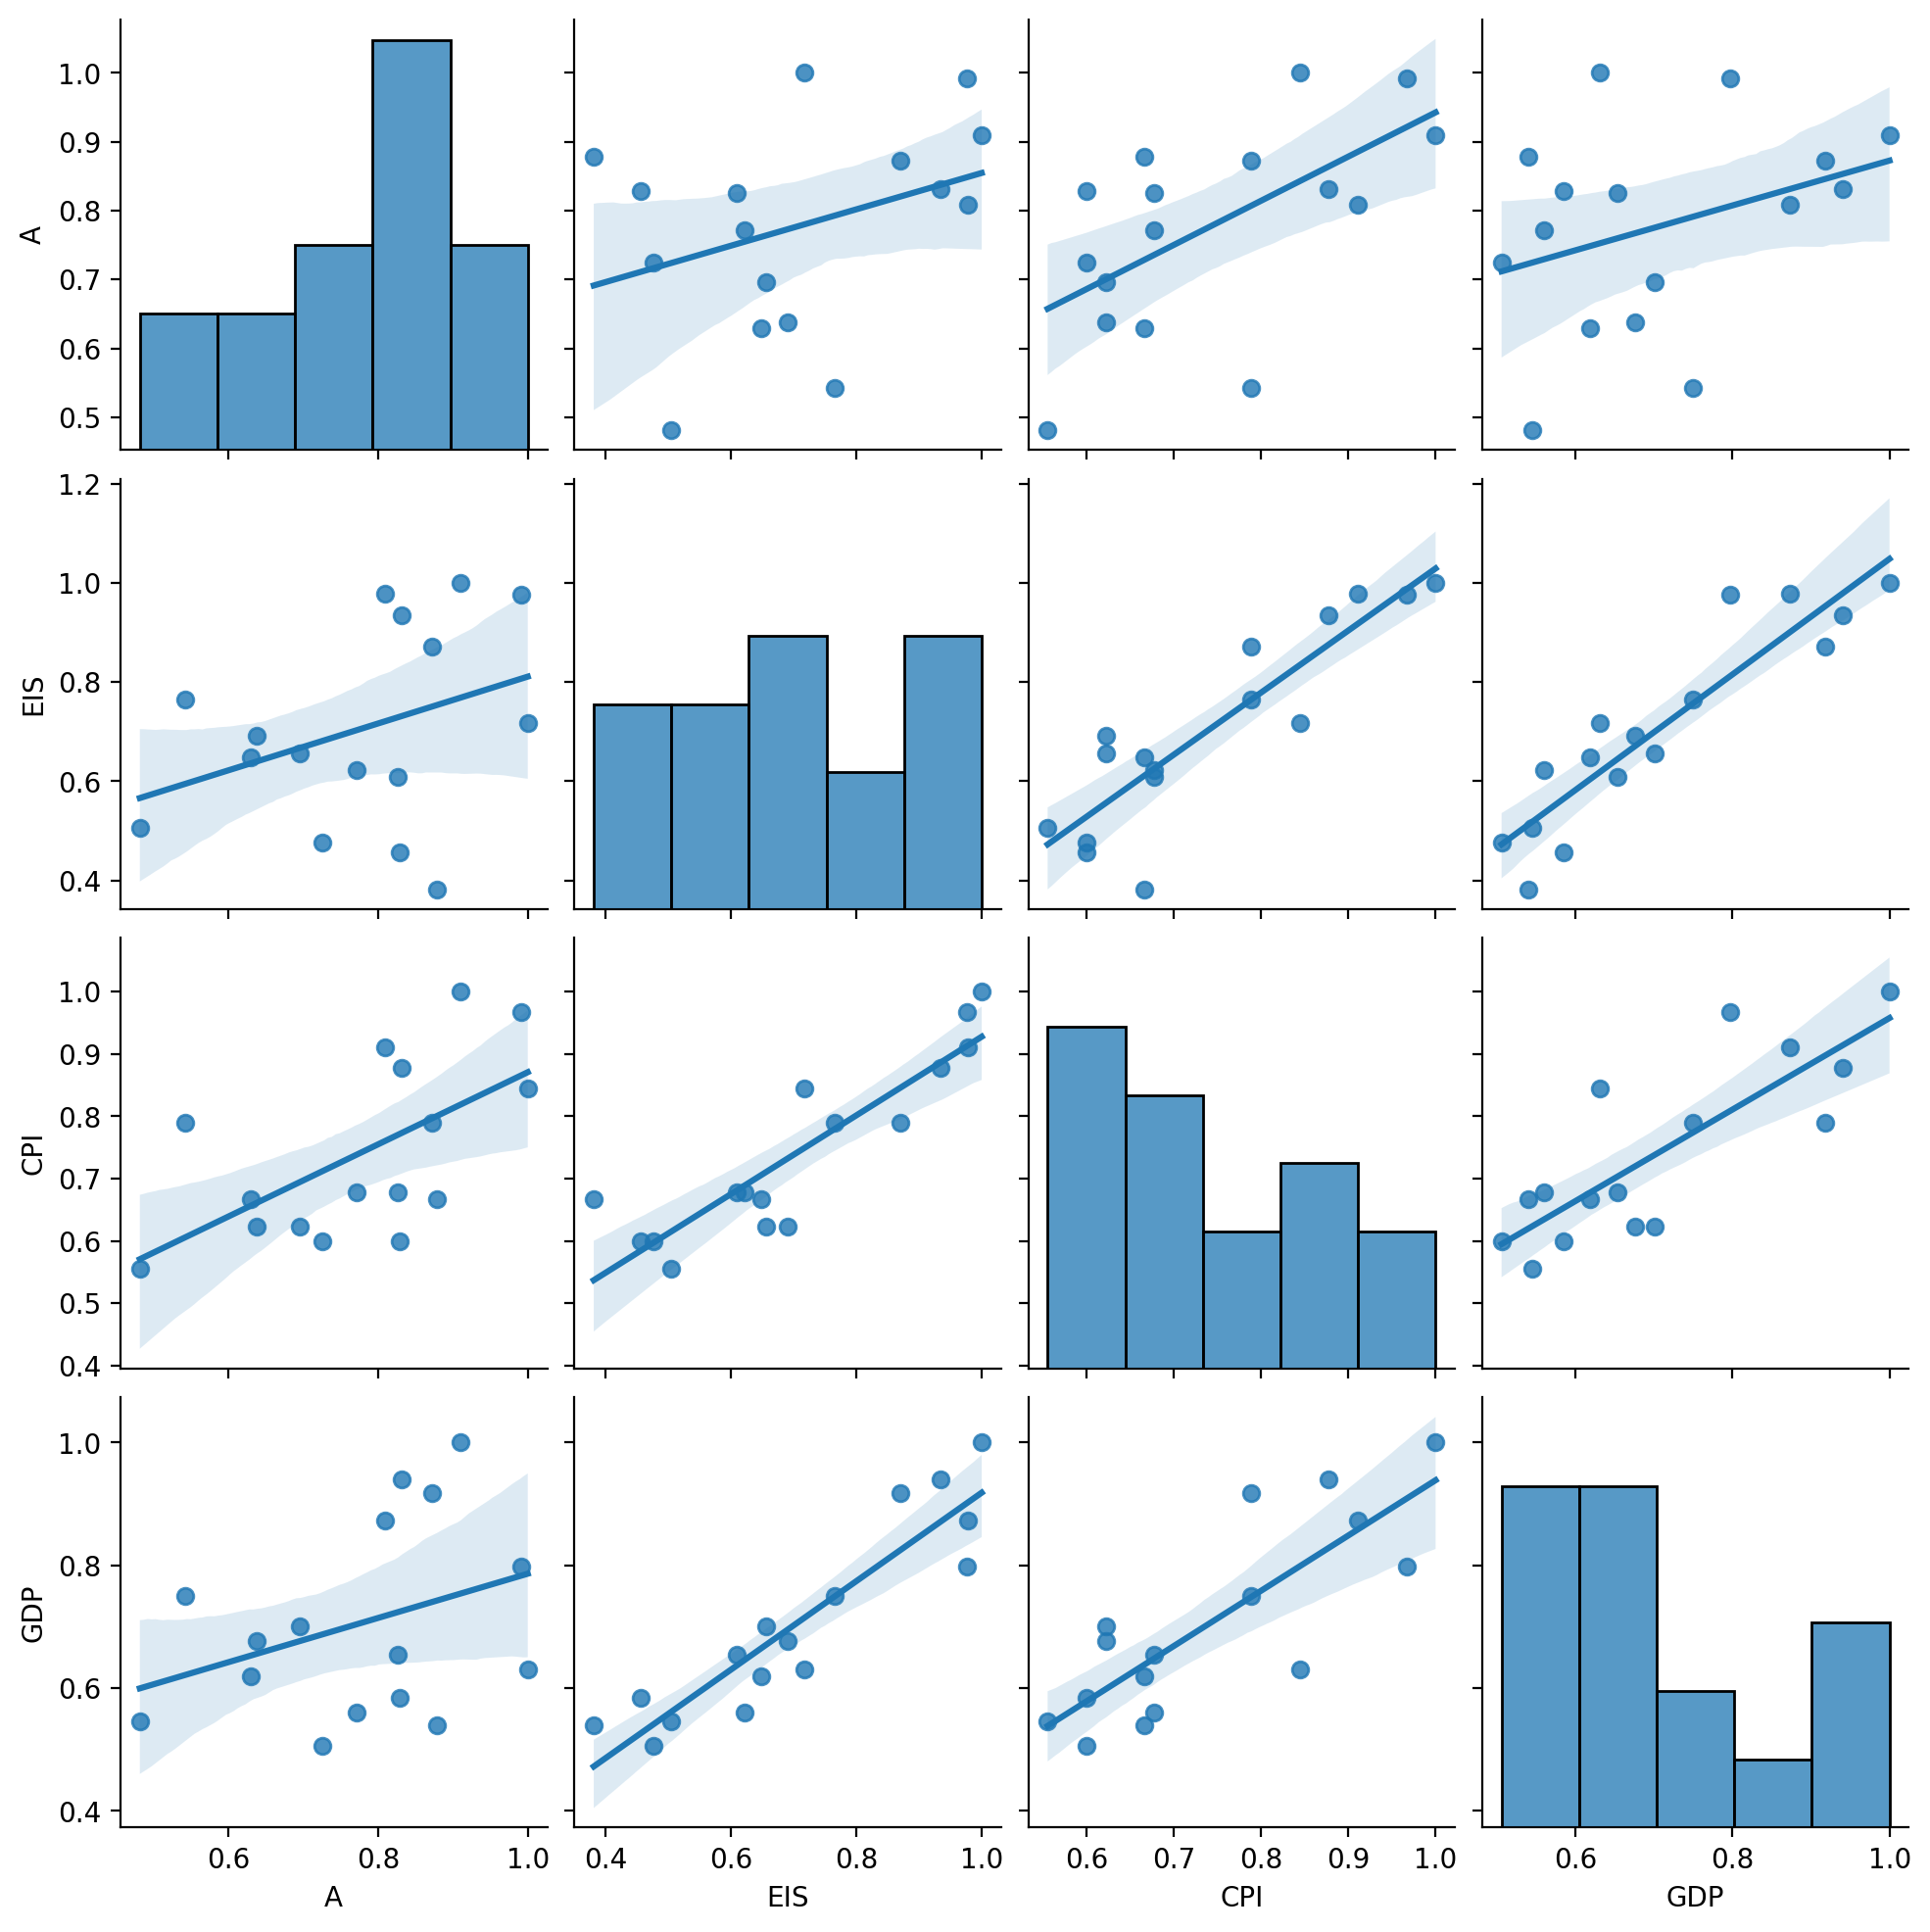

In [117]:
# plot correlations between first four columns with seaborn pairplot with regression line and confidence interval
sns.pairplot(df.iloc[:, 2:6], kind='reg')
plt.show()

In [144]:
# set up df called data1 with the first four columns from df and two clusters based on GDP: low and high
data1 = df.iloc[:, 2:6]
data1['Cluster'] = np.where(df['CPI'] < df['CPI'].median(), 'Low', 'High')
data1

,A,EIS,CPI,GDP,Cluster
0,0.872464,0.871053,0.788889,0.917984,High
1,0.481159,0.505504,0.555556,0.545630,Low
2,0.910145,1.000000,1.000000,1.000000,High
3,1.000000,0.716929,0.844444,0.630999,High
4,0.991304,0.975797,0.966667,0.797599,High
5,0.542029,0.765238,0.788889,0.749844,High
6,0.695652,0.656581,0.622222,0.700826,Low
7,0.878261,0.381708,0.666667,0.539909,Low
8,0.826087,0.609234,0.677778,0.653961,High
9,0.831884,0.935086,0.877778,0.940166,High


In [145]:
# show codes of countries with low GDP
df[data1['Cluster'] == 'High']


,EU_country,Code,A,EIS,CPI,GDP,A 2017,EIS 2017,CPI 2017,GDP 2017,Cluster
0,Austria,AT,0.872464,0.871053,0.788889,0.917984,0.776860,0.900508,0.852273,0.978617,2
2,Denmark,DK,0.910145,1.000000,1.000000,1.000000,0.892562,0.977210,1.000000,1.000000,2
3,Estonia,EE,1.000000,0.716929,0.844444,0.630999,1.000000,0.572684,0.806818,0.610982,1
4,Finland,FI,0.991304,0.975797,0.966667,0.797599,0.942149,0.912823,0.965909,0.859339,2
5,France,FR,0.542029,0.765238,0.788889,0.749844,0.506887,0.839551,0.795455,0.805270,0
8,Lithuania,LT,0.826087,0.609234,0.677778,0.653961,0.754821,0.536801,0.670455,0.609897,1
9,Netherlands,NL,0.831884,0.935086,0.877778,0.940166,0.735537,0.961342,0.931818,0.995158,2
11,Portugal,PT,0.771014,0.622365,0.677778,0.560115,0.732782,0.617592,0.715909,0.596942,1
15,Sweden,SE,0.808696,0.977744,0.911111,0.872616,0.771350,1.000000,0.954545,0.938422,2


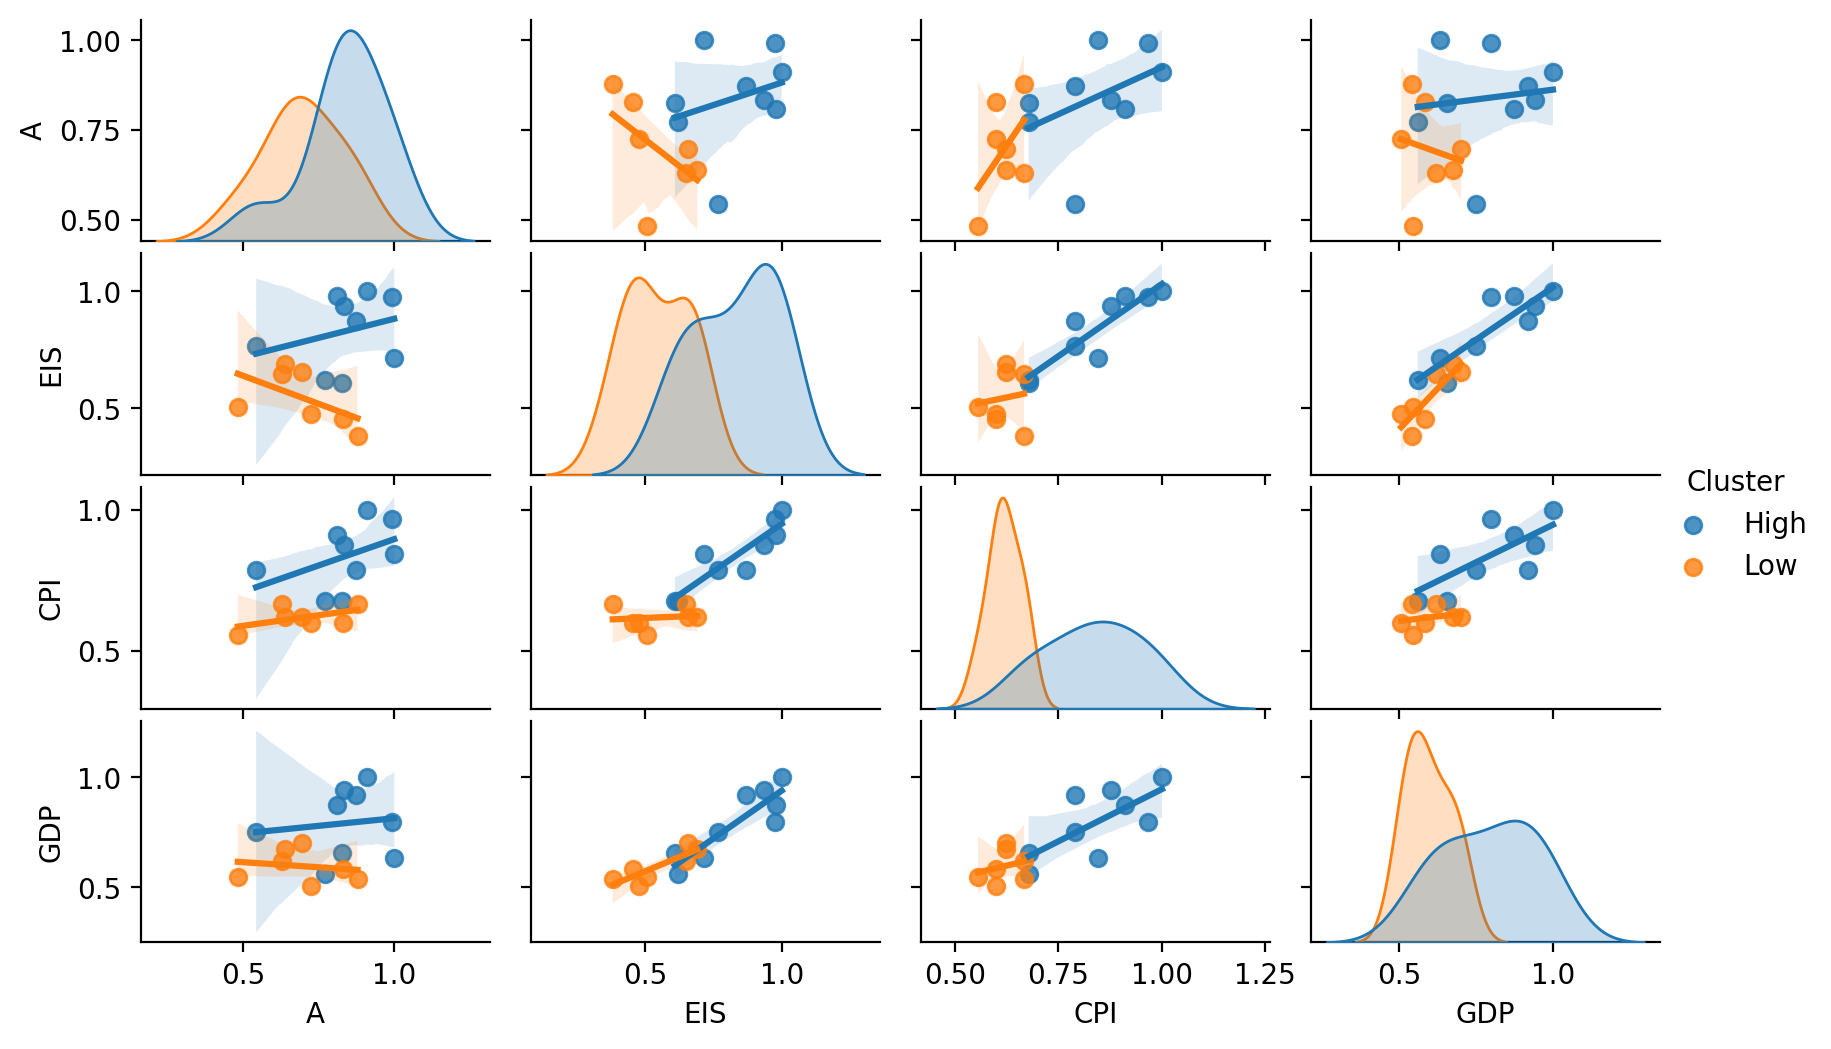

In [149]:
# plot correlations between first four columns with seaborn pairplot with regression line and confidence interval for each cluster
sns.pairplot(data1, kind='reg', hue='Cluster')
# place the legend inside the sns plot
# change aspect ratio in cm
plt.gcf().set_size_inches(9, 5)
# place the legend inside the sns plot
plt.show()


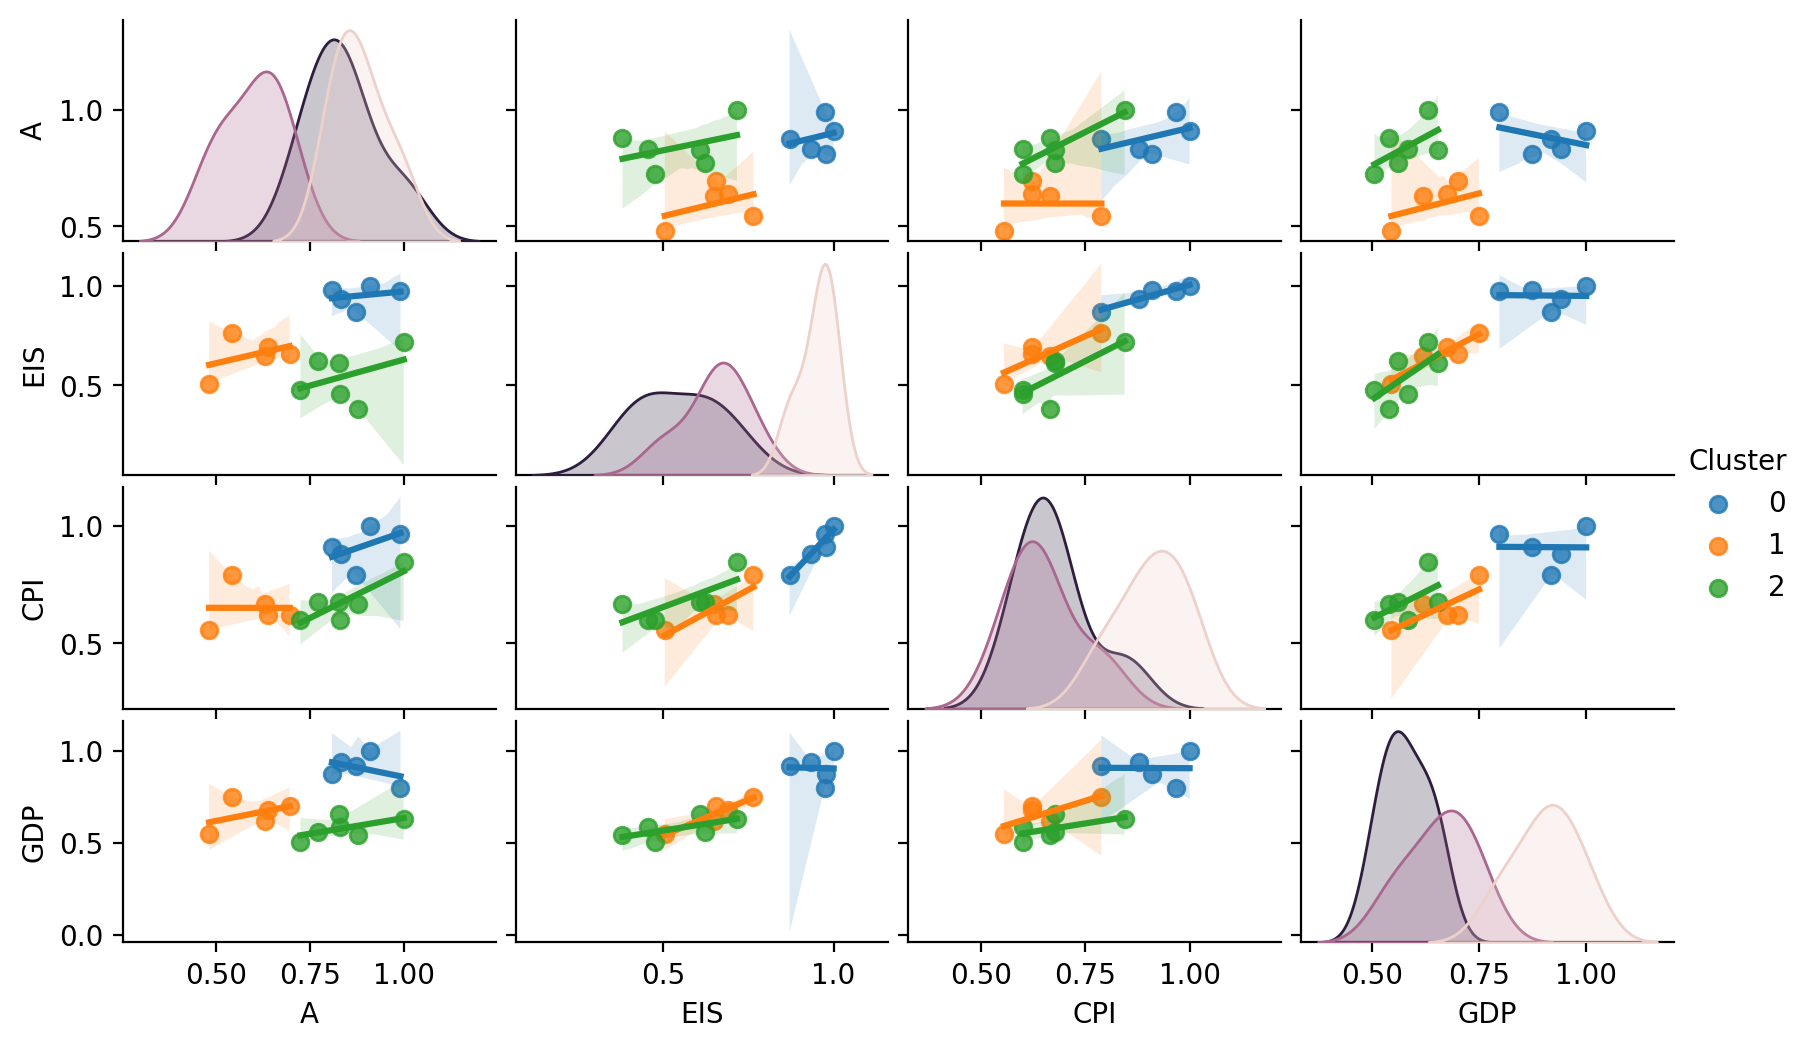

In [159]:
sns.pairplot(data, kind='reg', hue='Cluster')
# place the legend inside the sns plot
# change aspect ratio in cm
plt.gcf().set_size_inches(9, 5)
# place the legend inside the sns plot
plt.show()

In [60]:
# compute the mean of the differences for each cluster
df['Cluster'] = data['Cluster']
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis_std = df.groupby('Cluster').std()

print(cluster_analysis)

                A       EIS       CPI       GDP    A 2017  EIS 2017  CPI 2017  \
Cluster                                                                         
0        0.597101  0.653350  0.651111  0.658313  0.580165  0.649180  0.652273   
1        0.838164  0.543904  0.677778  0.579304  0.773646  0.500304  0.683712   
2        0.882899  0.951936  0.908889  0.905673  0.823691  0.950377  0.940909   

         GDP 2017  
Cluster            
0        0.684372  
1        0.570249  
2        0.954307  


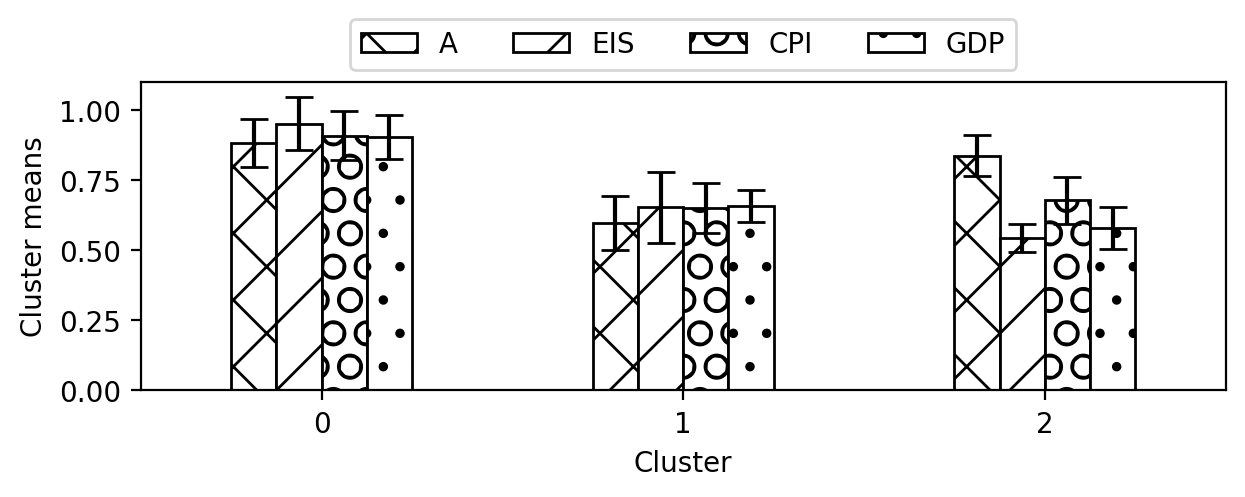

In [177]:
# replot the bar plot with black outline and differenct hatch patterns
ax = cluster_analysis.plot(kind='bar', y=['A', 'EIS', 'CPI', 'GDP'], yerr=cluster_analysis_std, capsize=5, edgecolor='black',
                           color='white', rot=0)
bars = ax.patches
hatches = ''.join(h*len(cluster_analysis) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.25))
ax.set_xlabel('Cluster')
ax.set_ylabel('Cluster means')
plt.gcf().set_size_inches(7, 2)




In [190]:
df

,EU_country,Code,A,EIS,CPI,GDP,A 2017,EIS 2017,CPI 2017,GDP 2017,Cluster
0,Austria,AT,0.872464,0.871053,0.788889,0.917984,0.776860,0.900508,0.852273,0.978617,1
1,Croatia,HR,0.481159,0.505504,0.555556,0.545630,0.575758,0.446422,0.556818,0.491484,0
2,Denmark,DK,0.910145,1.000000,1.000000,1.000000,0.892562,0.977210,1.000000,1.000000,1
3,Estonia,EE,1.000000,0.716929,0.844444,0.630999,1.000000,0.572684,0.806818,0.610982,2
4,Finland,FI,0.991304,0.975797,0.966667,0.797599,0.942149,0.912823,0.965909,0.859339,1
5,France,FR,0.542029,0.765238,0.788889,0.749844,0.506887,0.839551,0.795455,0.805270,0
6,Italy,IT,0.695652,0.656581,0.622222,0.700826,0.647383,0.607008,0.568182,0.751149,0
7,Latvia,LV,0.878261,0.381708,0.666667,0.539909,0.771350,0.384851,0.659091,0.517978,2
8,Lithuania,LT,0.826087,0.609234,0.677778,0.653961,0.754821,0.536801,0.670455,0.609897,2
9,Netherlands,NL,0.831884,0.935086,0.877778,0.940166,0.735537,0.961342,0.931818,0.995158,1


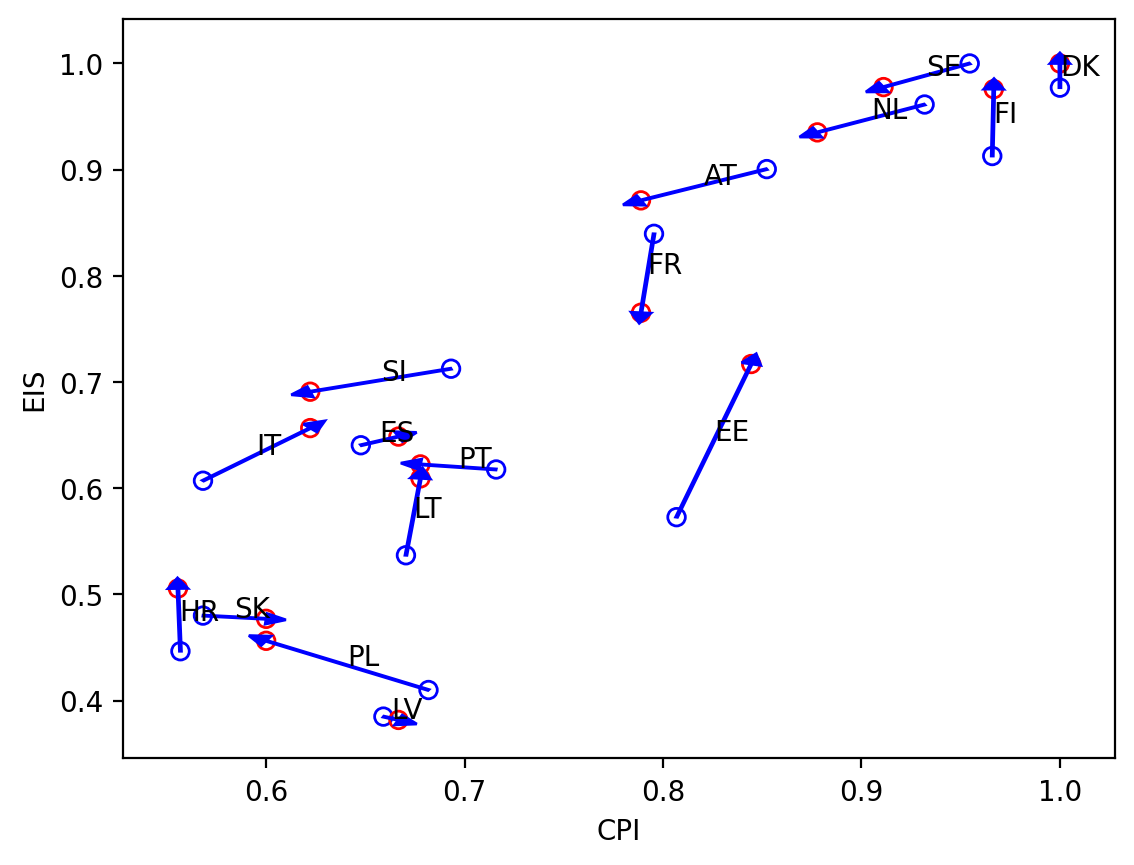

In [194]:
# same as above, just put the code labels in the middle of the arrows
xa = 'CPI 2017'
ya = 'EIS 2017'
xb = 'CPI'
yb = 'EIS'
plt.scatter(df[xa], df[ya], marker='o', s=40, facecolors='none', edgecolors='b')
plt.scatter(df[xb], df[yb], marker='o', s=40, facecolors='none', edgecolors='r')
for i in range(len(df)):
    plt.arrow(df[xa][i], df[ya][i], df[xb][i]-df[xa][i], df[yb][i]-df[ya][i], head_width=0.01, head_length=0.01, fc='b', ec='b')
    plt.text((df[xa][i]+df[xb][i])/2, (df[ya][i]+df[yb][i])/2, df['Code'][i])
plt.xlabel(xb)
plt.ylabel(yb)
plt.show()

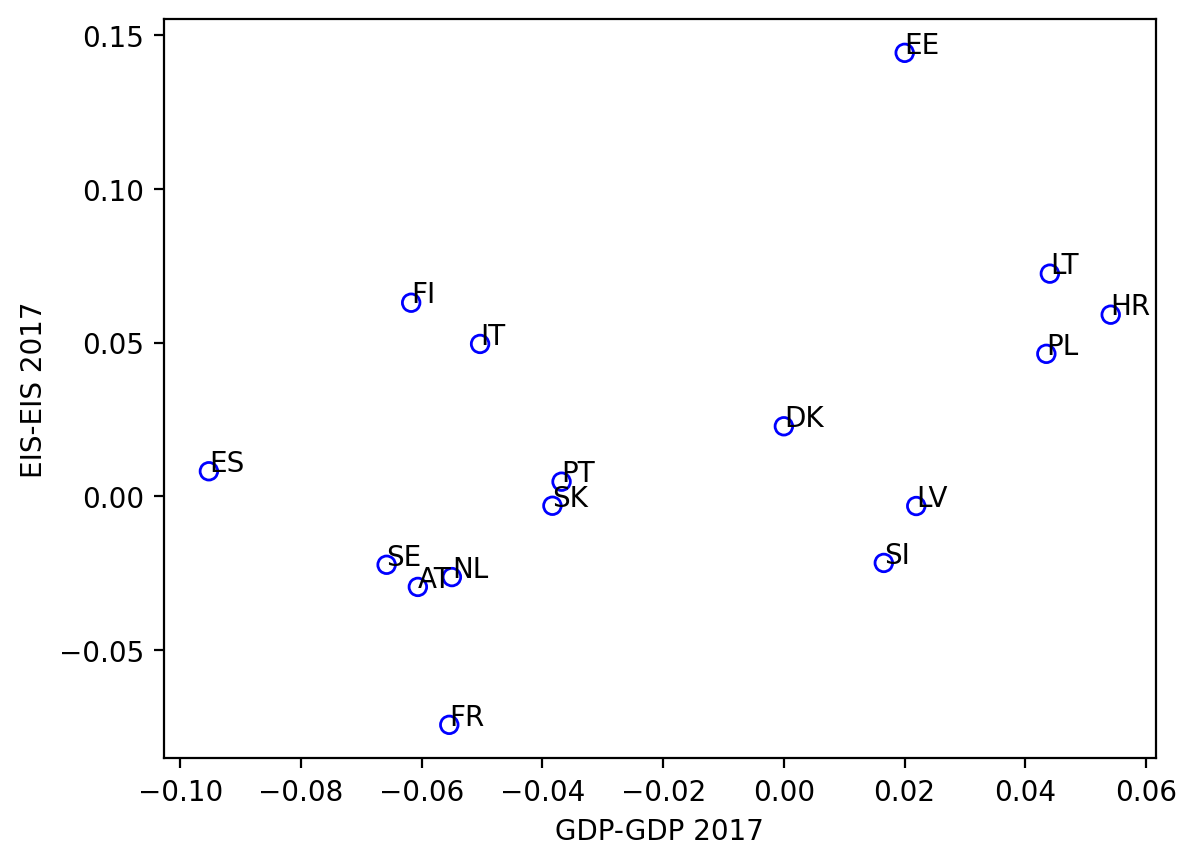

In [206]:
# plot the changes xb-xa and yb-ya
xa = 'GDP 2017'
ya = 'EIS 2017'
xb = 'GDP'
yb = 'EIS'
plt.scatter(df[xb]-df[xa], df[yb]-df[ya], marker='o', s=40, facecolors='none', edgecolors='b')
for i in range(len(df)):
    plt.text((df[xb]-df[xa])[i], (df[yb]-df[ya])[i], df['Code'][i])
plt.xlabel(f'{xb}-{xa}')
plt.ylabel(f'{yb}-{ya}')
plt.show()

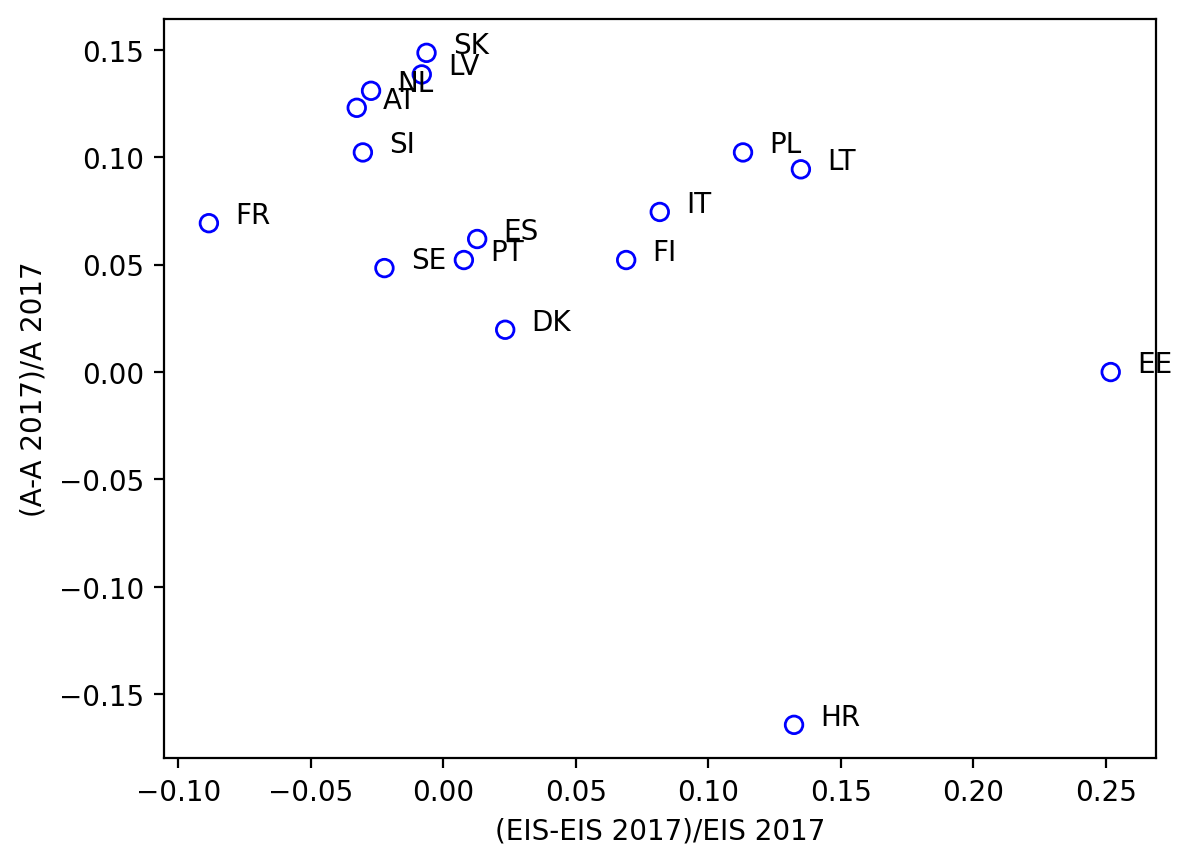

In [211]:
# plot relative changes (xb-xa)/xa and (yb-ya)/ya
xa = 'EIS 2017'
ya = 'A 2017'
xb = 'EIS'
yb = 'A'
plt.scatter((df[xb]-df[xa])/df[xa], (df[yb]-df[ya])/df[ya], marker='o', s=40, facecolors='none', edgecolors='b')
for i in range(len(df)):
    plt.text((0.01+(df[xb]-df[xa])/df[xa])[i], ((df[yb]-df[ya])/df[ya])[i], df['Code'][i])
plt.xlabel(f'({xb}-{xa})/{xa}')
plt.ylabel(f'({yb}-{ya})/{ya}')
plt.show()

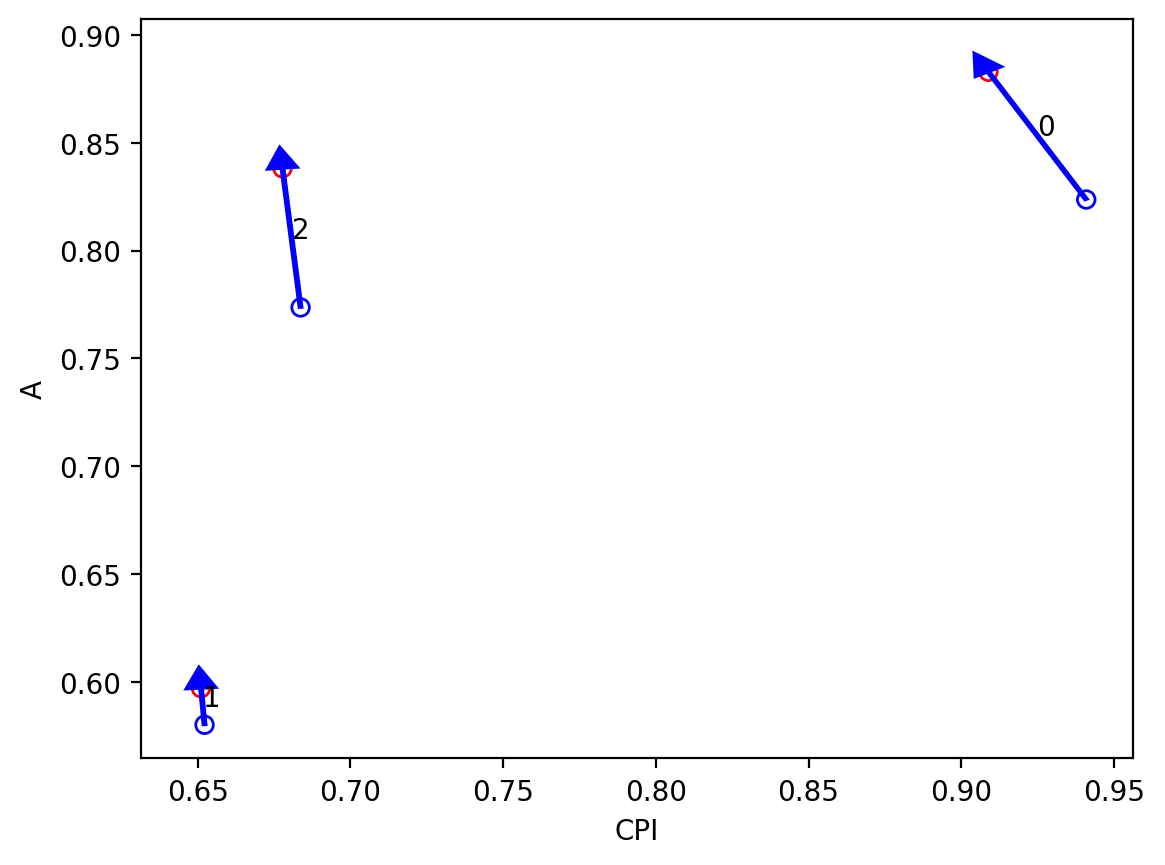

In [193]:
# compute the mean of the differences for each cluster
df['Cluster'] = data['Cluster']
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis_std = df.groupby('Cluster').std()
# plot the change in the cluster means, put the code labels in the middle of the arrows
xa = 'CPI 2017'
ya = 'A 2017'
xb = 'CPI'
yb = 'A'
plt.scatter(cluster_analysis[xa], cluster_analysis[ya], marker='o', s=40, facecolors='none', edgecolors='b')
plt.scatter(cluster_analysis[xb], cluster_analysis[yb], marker='o', s=40, facecolors='none', edgecolors='r')
for i in range(len(cluster_analysis)):
    plt.arrow(cluster_analysis[xa][i], cluster_analysis[ya][i], cluster_analysis[xb][i]-cluster_analysis[xa][i], cluster_analysis[yb][i]-cluster_analysis[ya][i], head_width=0.01, head_length=0.01, fc='b', ec='b')
    plt.text((cluster_analysis[xa][i]+cluster_analysis[xb][i])/2, (cluster_analysis[ya][i]+cluster_analysis[yb][i])/2, cluster_analysis.index[i])
plt.xlabel(xb)
plt.ylabel(yb)
plt.show()




In [209]:
# display code of clusters organized by cluster number with cluster number
data['Code'] = df['Code']
data = data.sort_values(by='Cluster')
# save cluster numbers and codes to a dictionary
cluster_codes = {}
for i in range(3):
    cluster_codes[i] = data[data['Cluster'] == i]['Code'].values
cluster_codes


{0: array(['AT', 'DK', 'FI', 'NL', 'SE'], dtype=object),
 1: array(['HR', 'FR', 'IT', 'SI', 'ES'], dtype=object),
 2: array(['EE', 'LV', 'LT', 'PL', 'PT', 'SK'], dtype=object)}

In [210]:
data = df.iloc[:,6:10]
# reindex data
data = data.reset_index(drop=True)
data

,A 2017,EIS 2017,CPI 2017,GDP 2017
0,0.776860,0.900508,0.852273,0.978617
1,0.575758,0.446422,0.556818,0.491484
2,0.892562,0.977210,1.000000,1.000000
3,1.000000,0.572684,0.806818,0.610982
4,0.942149,0.912823,0.965909,0.859339
5,0.506887,0.839551,0.795455,0.805270
6,0.647383,0.607008,0.568182,0.751149
7,0.771350,0.384851,0.659091,0.517978
8,0.754821,0.536801,0.670455,0.609897
9,0.735537,0.961342,0.931818,0.995158


In [211]:
optimal_number_of_clusters = 3
kmeans = KMeans(n_clusters=optimal_number_of_clusters, init='k-means++')
y_kmeans = kmeans.fit_predict(data_scaled)
data['Cluster'] = y_kmeans
data['Code'] = df['Code']
cluster_codes_2017 = {}
for i in range(3):
    cluster_codes_2017[i] = data[data['Cluster'] == i]['Code'].values

In [212]:
cluster_codes

{0: array(['AT', 'DK', 'FI', 'NL', 'SE'], dtype=object),
 1: array(['HR', 'FR', 'IT', 'SI', 'ES'], dtype=object),
 2: array(['EE', 'LV', 'LT', 'PL', 'PT', 'SK'], dtype=object)}

In [213]:
cluster_codes_2017

{0: array(['AT', 'DK', 'FI', 'NL', 'SE'], dtype=object),
 1: array(['EE', 'LV', 'LT', 'PL', 'PT', 'SK'], dtype=object),
 2: array(['HR', 'FR', 'IT', 'SI', 'ES'], dtype=object)}

In [218]:
# compute std of 'A', 'EIS', 'CPI', 'GDP' in df
df_std = df[['A', 'EIS', 'CPI', 'GDP']].var()
# and for 'A 2017', 'EIS 2017', 'CPI 2017', 'GDP 2017'
df_std_2017 = df[['A 2017', 'EIS 2017', 'CPI 2017', 'GDP 2017']].var()

# compute std of 'A', 'EIS', 'CPI', 'GDP' in df
df_mean = df[['A', 'EIS', 'CPI', 'GDP']].mean()
# and for 'A 2017', 'EIS 2017', 'CPI 2017', 'GDP 2017'
df_mean_2017 = df[['A 2017', 'EIS 2017', 'CPI 2017', 'GDP 2017']].mean()






In [222]:
(df_std.to_numpy() - df_std_2017.to_numpy())/df_std_2017.to_numpy()

array([ 0.18402512, -0.13915666, -0.10283938, -0.25105615])

In [217]:
(df_mean.to_numpy() - df_mean_2017.to_numpy())/df_mean_2017.to_numpy()

array([ 0.06584497,  0.02638733, -0.01669805, -0.02747656])

In [244]:
### influence of autonomy indicator on clustering results
data = df.iloc[:,2:5]
data = df[['A','EIS','GDP']]
# reindex data
data = data.reset_index(drop=True)
data

,A,EIS,GDP
0,0.872464,0.871053,0.917984
1,0.481159,0.505504,0.545630
2,0.910145,1.000000,1.000000
3,1.000000,0.716929,0.630999
4,0.991304,0.975797,0.797599
5,0.542029,0.765238,0.749844
6,0.695652,0.656581,0.700826
7,0.878261,0.381708,0.539909
8,0.826087,0.609234,0.653961
9,0.831884,0.935086,0.940166


In [245]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
optimal_number_of_clusters = 3
kmeans = KMeans(n_clusters=optimal_number_of_clusters, init='k-means++')
y_kmeans = kmeans.fit_predict(data_scaled)
data['Cluster'] = y_kmeans
data['Code'] = df['Code']
cluster_codes = {}
for i in range(3):
    cluster_codes[i] = data[data['Cluster'] == i]['Code'].values
cluster_codes

{0: array(['EE', 'LV', 'LT', 'PL', 'PT', 'SK'], dtype=object),
 1: array(['AT', 'DK', 'FI', 'NL', 'SE'], dtype=object),
 2: array(['HR', 'FR', 'IT', 'SI', 'ES'], dtype=object)}

In [248]:
data = df[['A','EIS','GDP','CPI']]
# reindex data
data = data.reset_index(drop=True)
data

,A,EIS,GDP,CPI
0,0.872464,0.871053,0.917984,0.788889
1,0.481159,0.505504,0.545630,0.555556
2,0.910145,1.000000,1.000000,1.000000
3,1.000000,0.716929,0.630999,0.844444
4,0.991304,0.975797,0.797599,0.966667
5,0.542029,0.765238,0.749844,0.788889
6,0.695652,0.656581,0.700826,0.622222
7,0.878261,0.381708,0.539909,0.666667
8,0.826087,0.609234,0.653961,0.677778
9,0.831884,0.935086,0.940166,0.877778


In [251]:
# compute all correlations between columns in data with p values
from scipy.stats import spearmanr
correlations = pd.DataFrame()
p_values = pd.DataFrame()
for i in data.columns:
    for j in data.columns:
        corr, p_value = spearmanr(data[i], data[j])
        correlations.loc[i, j] = corr
        p_values.loc[i, j] = p_value



In [254]:
correlations.round(2)

,A,EIS,GDP,CPI
A,1.00,0.31,0.32,0.62
EIS,0.31,1.00,0.91,0.85
GDP,0.32,0.91,1.00,0.77
CPI,0.62,0.85,0.77,1.00


In [257]:
p_values.round(5)

,A,EIS,GDP,CPI
A,0.00000,0.23980,0.23057,0.01114
EIS,0.23980,0.00000,0.00000,0.00003
GDP,0.23057,0.00000,0.00000,0.00048
CPI,0.01114,0.00003,0.00048,0.00000


In [259]:
data = df[['A 2017','EIS 2017','GDP 2017','CPI 2017']]
# reindex data
data = data.reset_index(drop=True)

correlations = pd.DataFrame()
p_values = pd.DataFrame()
for i in data.columns:
    for j in data.columns:
        corr, p_value = spearmanr(data[i], data[j])
        correlations.loc[i, j] = corr
        p_values.loc[i, j] = p_value

correlations.round(2)

,A 2017,EIS 2017,GDP 2017,CPI 2017
A 2017,1.00,0.23,0.32,0.63
EIS 2017,0.23,1.00,0.93,0.80
GDP 2017,0.32,0.93,1.00,0.77
CPI 2017,0.63,0.80,0.77,1.00


In [260]:
p_values.round(5)

,A 2017,EIS 2017,GDP 2017,CPI 2017
A 2017,0.00000,0.39549,0.22344,0.00928
EIS 2017,0.39549,0.00000,0.00000,0.00019
GDP 2017,0.22344,0.00000,0.00000,0.00055
CPI 2017,0.00928,0.00019,0.00055,0.00000


In [262]:
# compute pearson correlations
from scipy.stats import pearsonr

correlations = pd.DataFrame()
p_values = pd.DataFrame()
for i in data.columns:
    for j in data.columns:
        corr, p_value = pearsonr(data[i], data[j])
        correlations.loc[i, j] = corr
        p_values.loc[i, j] = p_value


In [263]:
correlations.round(2)

,A 2017,EIS 2017,GDP 2017,CPI 2017
A 2017,1.00,0.22,0.25,0.60
EIS 2017,0.22,1.00,0.96,0.87
GDP 2017,0.25,0.96,1.00,0.82
CPI 2017,0.60,0.87,0.82,1.00


In [264]:
p_values.round(5)

,A 2017,EIS 2017,GDP 2017,CPI 2017
A 2017,0.00000,0.40678,0.34785,0.01479
EIS 2017,0.40678,0.00000,0.00000,0.00001
GDP 2017,0.34785,0.00000,0.00000,0.00009
CPI 2017,0.01479,0.00001,0.00009,0.00000
